<a href="https://colab.research.google.com/github/JoanWaweru/Compiler-Construction-2022/blob/main/Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compiler Construction Group Work**

---



Group Members: 122466, 120374, 121425, 122182

*Lab 1: Definition of Flex, Lex, Bison and Yacc* 

# **A) FLEX**

Flex (fast lexical analyzer generator) is a tool for building compilers, it generates lexical analyzers.


*   A flex program has a list of regular expressions with actions which are instructions about what to do when the input matches any of them.
*   A flex-generated scanner reads through its input, matching the input against all of the regular expressions and doing the appropriate action on each match.


*   Flex translates all regular expressions into an efficient internal form that lets it match the input against all the patterns simultaneously.










![picture](https://media.geeksforgeeks.org/wp-content/uploads/how_flex_is_used.jpeg)

Simple Word Count Flex Program. It is meant to read through a file and return the number of lines, words, and characters.

In [ ]:
/***Variable are accessed inside yylex() and main()***/
%{
int chars = 0;
int words = 0;
int lines = 0;
%}

/***Rules Section***/

%%
[a-zA-Z]+ { words++; chars += strlen(yytext); }
\n { chars++; lines++; }
. { chars++; }
%%

/***Code Section that prints the number of lines,word and characters***/
int main()
{
 yylex();
 printf("%8d%8d%8d\n", lines, words, chars);
}


# **B) LEX**

*   Lex is a program that generates lexical analyzer. It is used with YACC parser generator.
*   The lexical analyzer is a program that transforms an input stream into a sequence of tokens.
*   It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.


 **The function of Lex is as follows:**
1.   Lexical analyzer creates a program lex.1 in the Lex language.
2.   Then Lex compiler runs the lex.1 program and produces a C program lex.yy.c.
3.   C compiler runs the lex.yy.c program and produces an object program a.out. (a.out is a lexical analyzer that transforms an input stream into a sequence of tokens).
This is illustrated in the diagram below

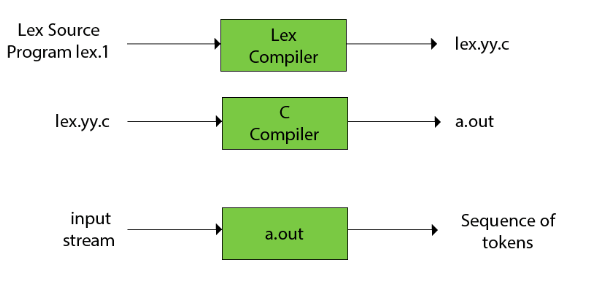

**Lex Syntax**

{ definitions }

%%

{ rules }

%%

{ user subroutines }

Where:


*   Definitions include declarations of constant, variable and regular definitions.
*   Rules define the statement of form p1 {action1} p2 {action2}....pn {action}. Where p1 describes the regular expression and action1 describes the actions the lexical analyzer should take when pattern p1 matches a lexeme.
*   User subroutines are auxiliary procedures needed by the actions. The subroutine can be loaded with the lexical analyzer and compiled separately.




In [ ]:
%{
	#include<stdio.h>
	#include<string.h>
	int a = 0, b=0, c=0, d=0, l=0;
%}
	

%%
[a-z] {a++;l++;}
[A-Z] {b++;l++;}
[0-9] {c++;l++;}
[$&+, :;=?@#|'<>.-^*()%!] {d++;l++;}
. ;
%%
	
int yywrap(void){}
	
int main()
{	
    // The function that starts the analysis
	yylex();
	if(a>0 && b>0 && c>0 && d>0 && l>=8)
	printf("VALID\n");
	else
		printf("INVALID\n");
	return 0;
}

# **C) BISON**



*  Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR(Left-to-right) and Rightmost) or generalized LR(GLR) parser employing LALR(1) parser tables.
*   List item



# **D) YACC**


*   YACC (Yet Another Compiler-Compiler) is an LALR(1) (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token) parser generator. 
*   YACC was initially intended to be used in conjunction with Lex.
*   The rule or grammar is the input to YACC, and the output is a C program.
*   YACC input file is divided into three parts:
    1.   Definition -> includes information about the tokens used in the syntax definition.
    2.   Rules -> contains grammar definition in a modified Backus Normal Form (BNF)
    3.   Auxiliary Routines -> includes function definitions for every function needed in rules part.
*   The output file "file.output" contains the parsing tables. The file "file.tab.h" contains declarations. The parser called the yyparse( ). Parser expects to use a function called yylex() to get tokens. The syntax is as follows:

        def function_name_here(symbol):
          expression = expression token_name term

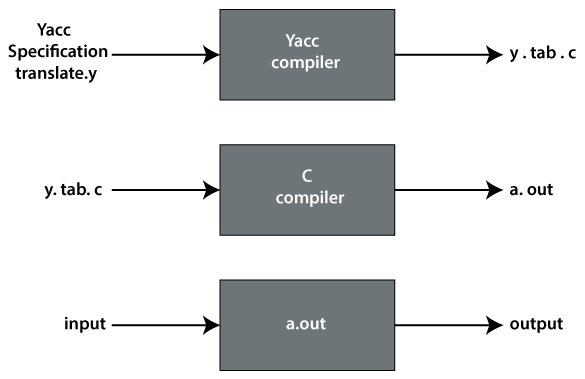

*Yacc Code Snippet*

In [ ]:
%{
#include <ctype.h>
#include <stdio.h>
#define YYSTYPE double /* double type for yacc stack */
%}

%%
Lines : Lines S '\n' { printf("OK \n"); }
	| S '\n’
	| error '\n' {yyerror("Error: reenter last line:");
						yyerrok; };
S	 : '(' S ')’
	| '[' S ']’
	| /* empty */ ;
%%

#include "lex.yy.c"

void yyerror(char * s)
/* yacc error handler */
{
fprintf (stderr, "%s\n", s);
}

int main(void)
{
return yyparse();
}


# **References**

1.   JavaTPoint. 2021. YACC - javatpoint. [online] Available at: <https://www.javatpoint.com/yacc#:~:text=YACC%20stands%20for%20Yet%20Another,by%20LALR%20(1)%20grammar.> [Accessed 5 September 2022]. 
2.   GeeksforGeeks. 2021. Introduction to YACC - GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/introduction-to-yacc/> [Accessed 5 September 2022].
3.   Tutorialandexample.com. 2020. YACC in Compiler Design. [online] Available at: <https://www.tutorialandexample.com/yacc> [Accessed 5 September 2022].